Topic: Natural Language Processing 

Concepts: 
1. Introduction to NLP: https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3
2. NLTK 3.5b1 documentation: https://www.nltk.org/
3. NLP Tutorial by Sentdex- https://www.youtube.com/watch?v=FLZvOKSCkxY

Task:
For Beginners: Movie Review Sentiment Analysis
Dataset: https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

Resources
Simple Sentiment Analysis : https://dzone.com/articles/simple-sentiment-analysis-with-nlp
Sentiment Analysis of Movie Reviews: https://towardsdatascience.com/sentiment-analysis-a-how-to-guide-with-movie-reviews-9ae335e6bcb2



Task: NLP Advanced-Twitter Sentiment Analysis
Detect hate/racist speech in tweets
Plotting WorldCloud for hate words
Plot the graph for hate/racist tweets and non-racist/hate tweets
Using extracting features from cleaned tweets- Bag-of-Words/TF-IDF
     
How can you proceed: 
Clean the Data 
Remove Twitter Handles @ from the data
Remove Punctuations, Numbers, and Special Characters
Remove Short Words
Perform tokenization and stemming
Understand common words  by plotting WorldcCloud


Dataset: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech#train.csv


Resources: 
https://monkeylearn.com/blog/sentiment-analysis-of-twitter/
Generating WordCloud: https://www.geeksforgeeks.org/generating-word-cloud-python/
Twitter Sentiment Analysis tutorial: https://pythonprogramming.net/twitter-sentiment-analysis-nltk-tutorial/
Bag of words model: https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/?ref=rp
Tokenizing words and sentences- https://pythonprogramming.net/tokenizing-words-sentences-nltk-tutorial/
Introduction to Stemming- https://www.geeksforgeeks.org/introduction-to-stemming/

In [0]:
# !pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"altafshaikh","key":"e4a7d1a5b1ac792fe0a1d2f4ad2017ef"}
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp .kaggle/kaggle.json ~/.kaggle/

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 63.4MB/s]


In [0]:
!ls {/content}/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

twitter-sentiment-analysis-hatred-speech.zip


In [0]:
!unzip {/content}/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech/twitter-sentiment-analysis-hatred-speech.zip

Archive:  {/content}/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech/twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


In [0]:
!ls

'{'   sample_data   test.csv   train.csv


In [0]:
import pandas as pd

In [0]:
# train and test dataframe
df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

In [0]:
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [0]:
!pip install unidecode

     |████████████████████████████████| 245kB 41.2MB/s 


In [0]:
import pandas_profiling
import nltk
import numpy as np

import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode

In [0]:
pandas_profiling.ProfileReport(df)


Number of variables,3
Number of observations,31962
Total Missing (%),0.0%
Total size in memory,749.2 KiB
Average record size in memory,24.0 B
Numeric,1
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:

df.shape

(31962, 3)

In [0]:
df.drop_duplicates(inplace = True)

In [0]:
df['tweet'].isna().sum()

0

In [0]:
df['label'].isna().sum()

0

In [0]:
#Data doesn't contain duplicate values neither does it contain missing values

In [0]:
#Code to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [0]:

df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
#Removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [0]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [0]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [0]:
#To check the disappearance of greek symbols
df['clean_tweet'][7]

"the next school year is the year for exams.d- can't think about that d #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [0]:

#Removing the word 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [0]:
df.head(3)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty


In [0]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [0]:
reformed

'I love myself'

In [0]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [0]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:

#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [0]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [0]:
frame = df['#']
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Count(#)'},axis = 'columns')
frame.head()

,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [0]:
frame[frame['Count(#)'] == ''] = 'No hashtags'
frame.head()

,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,No hashtags
3,#model
4,#motivation


In [0]:
data_frame = pd.concat([df,frame],axis = 1)


In [0]:
data_frame.drop('#',axis = 1,inplace = True)

In [0]:
#Column showing whether the corresponding tweet has a hash tagged word or not
data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')

In [0]:
data_frame.head()


,id,label,tweet,clean_tweet,Hash words
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Removing stopwords
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [0]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [0]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [0]:
#Stemming
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [0]:
#Tokenization
corpus = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)


In [0]:
#Ensuring all the tweets are tokenized into individual words
len(corpus)

31962

In [0]:
!pip install wordcloud

In [0]:

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

Normal words


(-0.5, 799.5, 499.5, -0.5)

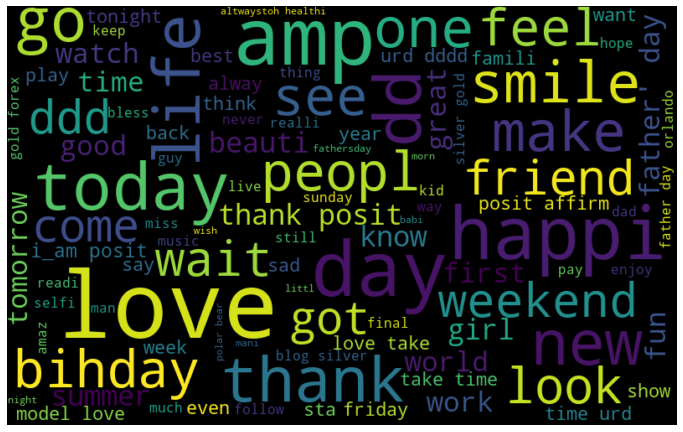

In [0]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [0]:
filename = "positive.png"
img = wordcloud.to_file(filename)
# plt.imshow(img)


Normal words


(-0.5, 799.5, 499.5, -0.5)

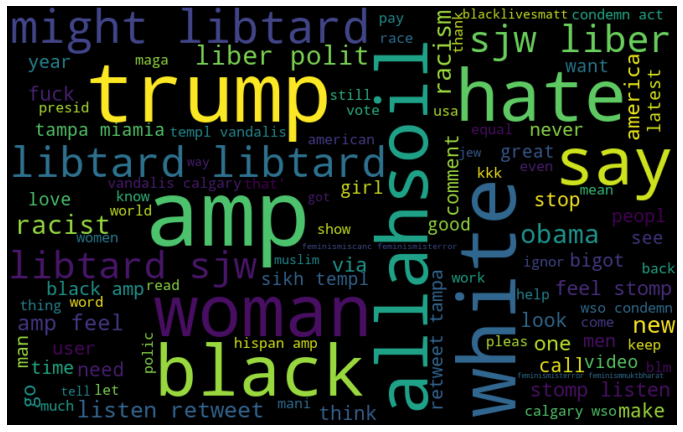

In [0]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [0]:
filename = "negative.png"
img = wordcloud.to_file(filename)
# plt.imshow(img)


In [0]:
#Collecting positive hashtags

hash_positive = []
hash_negative = []

In [0]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [0]:
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

In [0]:
q = Counter(hash_positive)
q = dict(q.most_common())

l_positive_count = list(q.values())

l_positive_count[0:4]

[1579, 905, 636, 558]

In [0]:
r = Counter(hash_negative)
r = dict(r.most_common())
l_negative_count = list(r.values())

l_negative_count[0:4]

[133, 94, 92, 79]

In [0]:
l_positive_values = list(q.keys())

l_positive_values[0:4]

['love', 'posit', 'smile', 'healthi']

In [0]:
l_negative_values = list(r.keys())

l_negative_values[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [0]:
# l_negative_values

In [0]:
import matplotlib.pyplot as plt 


plt.bar(range(500), list(q.values())[:500], align='center')
plt.xticks(range(500), list(q.keys())[:500])
# function to show the plot 
plt.show()
plt.savefig('q.png')

In [0]:
#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,love,1579,trump,133
1,posit,905,polit,94
2,smile,636,allahsoil,92
3,healthi,558,liber,79
4,thank,526,libtard,77
5,fun,434,sjw,75
6,affirm,422,retweet,57
7,life,399,black,46
8,model,374,miamia,38
9,summer,361,hate,36


In [0]:
#Animated plot for positive words with their frequency
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [0]:
# Animated plot for negative words with their frequency
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [0]:
#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()


In [0]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [0]:
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [0]:
#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers: -
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [0]:
X1
X1.size

437687628

In [0]:
Y1.size

31962

In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_frame['clean_tweet'], data_frame['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data_frame['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [0]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          8889   27
1           343  330
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.92      0.49      0.64       673

    accuracy                           0.96      9589
   macro avg       0.94      0.74      0.81      9589
weighted avg       0.96      0.96      0.96      9589



In [0]:
print(rf.predict([""]))

[0]


In [0]:
print(rf.predict(['lazi day beach mood beach sun summer nj seasidea']))

[0]


In [0]:
print(rf.predict(['white girl sex black guy best world sex']))

[1]
